<a href="https://colab.research.google.com/github/MadhuriKonnur/AVLoanDelinquency/blob/master/mk_AV_Loan__Delinquency_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** *Loan delinquency prediction**

using AutoEncoders , LR and XGB  predicted  m13 label for  loan delinqueny
*

by Madhuri Konnur

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Data  dependencies
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

###

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

access data from google  drive , for  example  from  drive  go to sharable  links  of  ( .csv files ) .
Take  test  and  train  data  csv files  shareable  links.
paste  it  and  take  out  id's 

train - https://drive.google.com/open?id=12EigyMTPblusJfY4m90iKrYHhyuxguEl
test- https://drive.google.com/open?id=1ACWrxAvHKcA-Av7G1CtsDw8gLxZCsw5Q

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [880]:
#Google drive  data access
train_downloaded=drive.CreateFile({'id':'12EigyMTPblusJfY4m90iKrYHhyuxguEl'})
train_downloaded.GetContentFile('train.csv')
test_downloaded=drive.CreateFile({'id':'1ACWrxAvHKcA-Av7G1CtsDw8gLxZCsw5Q'})
test_downloaded.GetContentFile('test.csv')


W0823 20:26:08.896358 140595411400576 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [0]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [882]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [883]:
# check out the size of the data
print("Train data shape:", data.shape)
print("Test data shape:", test.shape)

Train data shape: (116058, 29)
Test data shape: (35866, 28)


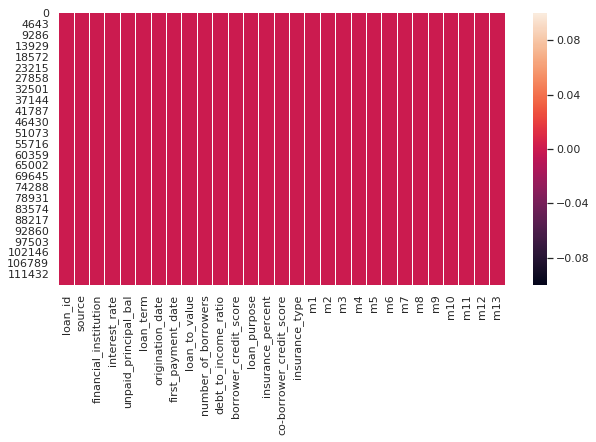

In [884]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull())

No Missing  data

In [885]:
data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

Encoding string to intiger ( Categoriacal object to intiger)

In [0]:
cols = ('source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose')


In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

The dataset consists of 15 anonymized variables, 'loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type
and 1 target variable - m13. 

Total 29 variables
       
       Let's look at the distribution of target.

0    115422
1       636
Name: m13, dtype: int64

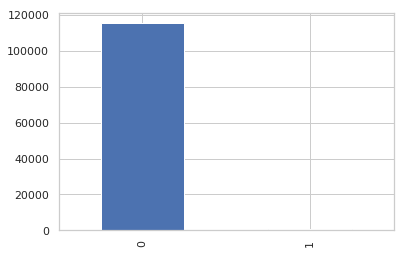

In [888]:
data['m13'].value_counts().plot('bar')
data['m13'].value_counts()

In [889]:
vc = data['m13'].value_counts().to_frame().reset_index()
vc['percent'] = vc["m13"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "m13" : "Count"})
vc

,Target,Count,percent
0,0,115422,99.45
1,1,636,0.55


One of the biggest challenge of this problem is that the target is highly imbalanced as only 0.55 % cases are Delinquency transactions. But the advantage of the representation learning approach is that it is still able to handle such imbalance nature of the problems. We will look how. For our use-case let's take only about 1000 rows of non-Delinquency transactions.

*Consider* only 1000 rows of non Delinquency cases

In [0]:
non_dlq = data[data['m13'] == 0].sample(1000)
dlq = data[data['m13'] == 1]

df = non_dlq.append(dlq).sample(frac=1).reset_index(drop=True)
X = df.drop(['m13'], axis = 1).values
Y = df["m13"].values

**Visualize Delinquency and NonDelinquency Transactions**

Let's visualize the nature of Delinquency(dlq) and non-delinquency transactions using T-SNE. T-SNE (t-Distributed Stochastic Neighbor Embedding) is a dataset decomposition technique which reduced the dimentions of data and produces only top n components with maximum information.

Every dot in the following represents a transaction. Non delinquency transactions are represented as Green while delinquency transactions are represented as Red. The two axis are the components extracted by tsne.

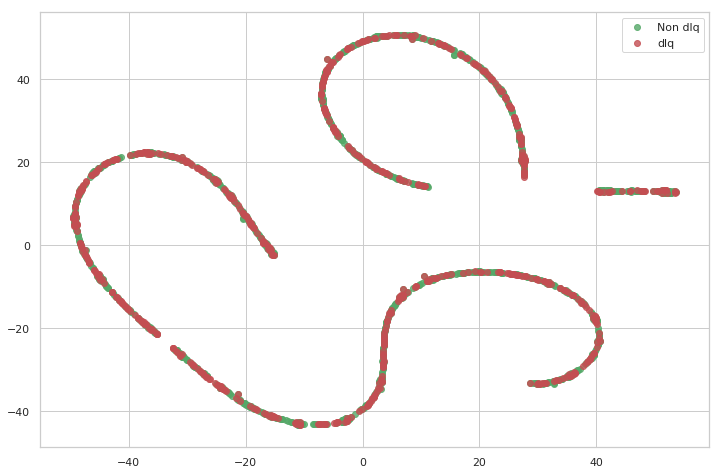

In [891]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non dlq')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='dlq')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")


From the above graph we can observe that there are many "dlq" transactions which are very close to "non_dlq" transactions, thus are difficult to accurately classify from a model.

**AutoEncoders to the rescue**

What are Autoencoders? - Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.




 create an autoencoder model in which we only show the model non-dlq cases. The model will try to learn the best representation of non-dlq cases. The same model will be used to generate the representations of dlq cases and we expect them to be different from non-dlq ones.

Create a network with one input layer and one output layer having identical dimentions ie. the shape of non-dlq cases. We will use keras package.

In [0]:
## input layer 
input_layer = Input(shape=(X.shape[1],))


## encoding part
#encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
#encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(150, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(100, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
#decoded = Dense(50, activation='tanh')(encoded)
#decoded = Dense(100, activation='tanh')(decoded)
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)
decoded = Dense(150, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

Create the model architecture by compiling input layer and output layers. Also add the optimizer and loss function, I am using "adadelta" as the optimizer and "mse" as the loss function.

In [0]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

Before training, let's perform min max scaling.

In [0]:
x = data.drop(["m13"], axis=1)
y = data["m13"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)

x_norm, x_dlq = x_scale[y == 0], x_scale[y == 1]



The beauty of this approach is that we do not need too many samples of data for learning the good representations. We will use only 2000 rows of non delinquency cases to train the autoencoder. Additionally, We do not need to run this model for a large number of epochs.

Explanation: The choice of small samples from the original dataset is based on the intuition that one class characteristics (non dlq) will differ from that of the other (dlq). To distinguish these characteristics we need to show the autoencoders only one class of data. This is because the autoencoder will try to learn only one class and automaticlly distinuish the other class.

In [895]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size =300, epochs =100, 
                shuffle = True, validation_split = 0.20);

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 1s 628us/step - loss: 0.8443 - val_loss: 0.6266
Epoch 2/100
1600/1600 [==============================] - 0s 31us/step - loss: 0.6517 - val_loss: 0.5142
Epoch 3/100
1600/1600 [==============================] - 0s 33us/step - loss: 0.5435 - val_loss: 0.4371
Epoch 4/100
1600/1600 [==============================] - 0s 30us/step - loss: 0.4669 - val_loss: 0.3843
Epoch 5/100
1600/1600 [==============================] - 0s 31us/step - loss: 0.4160 - val_loss: 0.3481
Epoch 6/100
1600/1600 [==============================] - 0s 31us/step - loss: 0.3798 - val_loss: 0.3214
Epoch 7/100
1600/1600 [==============================] - 0s 32us/step - loss: 0.3528 - val_loss: 0.3009
Epoch 8/100
1600/1600 [==============================] - 0s 30us/step - loss: 0.3315 - val_loss: 0.2851
Epoch 9/100
1600/1600 [==============================] - 0s 30us/step - loss: 0.3152 - val_loss: 0.2711
Epoch 10/100
160

**Obtain the Latent Representations**

Now, the model is trained. We are intereseted in obtaining latent representation of the input learned by the model. This can be accessed by the weights of the trained model. We will create another network containing sequential layers, and we will only add the trained weights till the third layer where latent representation exists.

In [0]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3]) # this one  added extra can be removed

Generate the hidden representations of two classes : non-dlq and dlq by predicting the raw inputs using the above model.

In [0]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000])
dlq_hid_rep = hidden_representation.predict(x_dlq)

**Visualize the latent representations : Delinquency Vs Non Deliquency**

Now we will create a training dataset using the latent representations obtained and let's visualize the nature of Deliquency vs non-Delinquency cases.

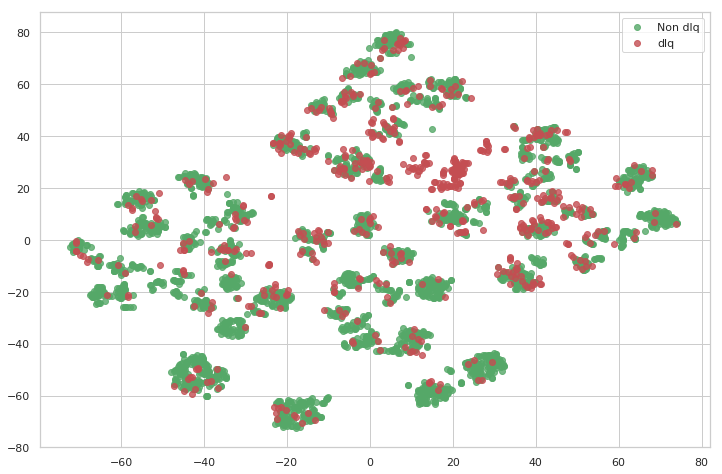

In [898]:
rep_x = np.append(norm_hid_rep, dlq_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(dlq_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

What a perfect graph, we can observe that now delinquency and non- deliquency transactions are pretty visibile and are linearly separable. Now we dont need any complex model to classify this, even the simpler models can be used to predict. Here is the before and after view of Delinquency and Non Deliquency transactions 

In [899]:
from IPython.display import display, Image, HTML
display(HTML("""<table align="center">
<tr ><td><b>Actual Representation (Before) </b></td><td><b>Latent Representation (Actual)</b></td></tr>
<tr><td><img src='original.png'></td><td>
             <img src='latent_representation.png'></td></tr></table>"""))

Actual Representation (Before),Latent Representation (Actual)
,


In [900]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.20,random_state=43)
clf = LogisticRegression(penalty = 'l1',C=0.7, random_state =42).fit(train_x, train_y)
pred_y = clf.predict(val_x)

print (classification_report(val_y, pred_y))
print (accuracy_score(val_y, pred_y))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       590
         1.0       0.98      0.36      0.52       138

    accuracy                           0.88       728
   macro avg       0.92      0.68      0.73       728
weighted avg       0.89      0.88      0.85       728

0.8763736263736264


In [901]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(val_y, pred_y)
print('AUC: %.3f' % auc)

AUC: 0.677


XGB

In [902]:
import xgboost as xgb
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.20, random_state=43)
clf1 = xgb.XGBClassifier(n_jobs = -1,n_estimators =300,max_depth=10,objective='binary:logistic',scale_pos_weight=4,  gamma=10
                      ).fit(train_x, train_y)
pred_y = clf1.predict(val_x)

print (classification_report(val_y, pred_y))
print (accuracy_score(val_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       590
         1.0       0.79      0.58      0.67       138

    accuracy                           0.89       728
   macro avg       0.85      0.77      0.80       728
weighted avg       0.89      0.89      0.88       728

0.8914835164835165


In [903]:
# calculate AUC
auc = roc_auc_score(val_y, pred_y)
print('AUC: %.3f' % auc)

AUC: 0.772


Submission

In [0]:
# let's scale  test  value 

# here  also all catagorial vaar to  int
# c is  already defined during train data
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))
    
#Standardising  values  like train data

scaler = preprocessing.MinMaxScaler()
scaler.fit(test.values)
test_x_scale = scaler.transform(test.values)

In [905]:
temp = pd.DataFrame([])
test_rep_x = hidden_representation.predict(test_x_scale)
temp['m13'] = [int(x) for x in clf.predict(test_rep_x)]
temp.to_csv("submission.csv", index = False)
sub= pd.read_csv("submission.csv")
r=pd.RangeIndex(start=1, stop=35867, step=1)
sub1=sub.insert(0,'loan_id',r)

t=pd.concat([sub1,sub])
t.to_csv("submission1.csv", index = False)

t.head()











,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
# downloading  the submission file directly  (without  google  drive )

#from google.colab import files
#files.download('sample_submission1.csv')